In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))
from src import EDA
%load_ext autoreload
%autoreload 2

In [3]:
steam_df = EDA.load_200k()

In [4]:
total_hours_played = steam_df['playtime'].sum()
print('Total hours played: ', total_hours_played)
print('Number of records: ', steam_df.count())
steam_df.head()

Total hours played:  3445365.8000000766
Number of records:  uid                70489
game_name          70489
purchase_action    70489
playtime           70489
dtype: int64


,uid,game_name,purchase_action,playtime
1,151603712,The Elder Scrolls V Skyrim,play,273.0
3,151603712,Fallout 4,play,87.0
5,151603712,Spore,play,14.9
7,151603712,Fallout New Vegas,play,12.1
9,151603712,Left 4 Dead 2,play,8.9


In [5]:
# remove low high data so that we can see a more granular distribution
# we want to keep the high playtime data for actual analysis
over_1000 = steam_df[steam_df['playtime'] > 1000].shape[0]
at_1 = steam_df[steam_df['playtime'] == 1].shape[0]
print('User purchased but did not play: ', at_1)
print('Dropping ', over_1000 + at_1)
steam_df_no_outliers = steam_df[(steam_df['playtime'] <= 1000) & (steam_df['playtime'] > 1)]

User purchased but did not play:  1058
Dropping  1682


Average hours played:  43.1691512063833


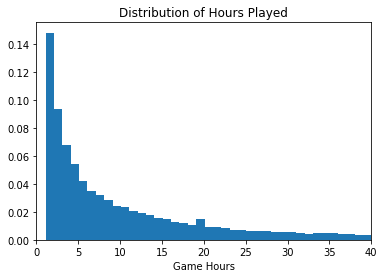

In [6]:
# Determine good cutoffs for low med high playtime
print('Average hours played: ', steam_df_no_outliers['playtime'].mean())
ax, fig = plt.subplots()
fig.hist(steam_df_no_outliers['playtime'], bins=1000, normed=True)
fig.set_xlim(0, 40)
fig.set_title('Distribution of Hours Played')
fig.set_xlabel('Game Hours')
ax.show()

# For initial runthrough, 2-5, 6-25, 26+ seem like good cutoffs

In [7]:
steam_df["playtime_rank"] = steam_df['playtime'].map(lambda value: EDA.rank_playtime(value))

In [8]:
steam_df['playtime_rank'].value_counts()

1    18918
0    17850
3    16961
2    16760
Name: playtime_rank, dtype: int64

## The Percent of Users who have played many games is low
#### But users need to have played a significant number of games before we can recommend anything

Number of unique users:  11350


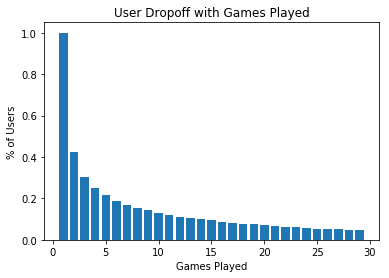

In [9]:
game_counts = steam_df.groupby('uid').count()
print('Number of unique users: ', game_counts.shape[0])

range_max = 30
counts = [game_counts[game_counts['game_name'] >= i].shape[0] for i in range (1, range_max)]
percent_counts = [count / counts[0] for count in counts]

fig, ax = plt.subplots()
ax.bar(list(range(1, range_max)), percent_counts)
ax.set_title('User Dropoff with Games Played')
ax.set_xlabel('Games Played')
ax.set_ylabel('% of Users')
fig.show()

In [10]:
users_with_5_games_df = EDA.load_200k_n_games_played(5)
users_with_5_games_df.shape[0]

57789